In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
movie = 'movies.dat'

In [14]:
with open(movie, 'r', encoding='latin-1') as archivo:
    lineas = archivo.readlines()
datos = [linea.strip().split('::') for linea in lineas]
columnas = ['ID', 'Titulo', 'Genero']
df = pd.DataFrame(datos, columns=columnas)

# Divide la columna 'Titulo' en 'Pelicula' y 'Año'
df[['Pelicula', 'Año']] = df['Titulo'].str.rsplit('(', n=1, expand=True)

# Limpia los paréntesis alrededor del año
df['Año'] = df['Año'].str.rstrip(')')

# Selecciona solo un género (puedes elegir el primero, por ejemplo)
df['Genero'] = df['Genero'].str.split('|').str[0]

# Elimina la columna 'Titulo' ya que ahora está dividida en 'Pelicula' y 'Año'
df = df.drop('Titulo', axis=1)
df = df.drop('ID', axis=1)

In [15]:
df

,Genero,Pelicula,Año
0,Animation,Toy Story,1995
1,Adventure,Jumanji,1995
2,Comedy,Grumpier Old Men,1995
3,Comedy,Waiting to Exhale,1995
4,Comedy,Father of the Bride Part II,1995
...,...,...,...
3878,Comedy,Meet the Parents,2000
3879,Drama,Requiem for a Dream,2000
3880,Drama,Tigerland,2000
3881,Drama,Two Family House,2000


In [16]:
df.insert(2, 'Genero', df.pop('Genero'))

In [17]:
df

,Pelicula,Año,Genero
0,Toy Story,1995,Animation
1,Jumanji,1995,Adventure
2,Grumpier Old Men,1995,Comedy
3,Waiting to Exhale,1995,Comedy
4,Father of the Bride Part II,1995,Comedy
...,...,...,...
3878,Meet the Parents,2000,Comedy
3879,Requiem for a Dream,2000,Drama
3880,Tigerland,2000,Drama
3881,Two Family House,2000,Drama


In [18]:
df['Año'] = pd.to_numeric(df['Año'], errors='coerce')

In [19]:
df

,Pelicula,Año,Genero
0,Toy Story,1995,Animation
1,Jumanji,1995,Adventure
2,Grumpier Old Men,1995,Comedy
3,Waiting to Exhale,1995,Comedy
4,Father of the Bride Part II,1995,Comedy
...,...,...,...
3878,Meet the Parents,2000,Comedy
3879,Requiem for a Dream,2000,Drama
3880,Tigerland,2000,Drama
3881,Two Family House,2000,Drama


In [21]:
df[df['Pelicula'].isnull()]

,Pelicula,Año,Genero


In [22]:
df[df['Año'].isnull()]

,Pelicula,Año,Genero


In [23]:
df[df['Genero'].isnull()]

,Pelicula,Año,Genero


In [24]:
muestra = (df[df['Año'] == 2000])

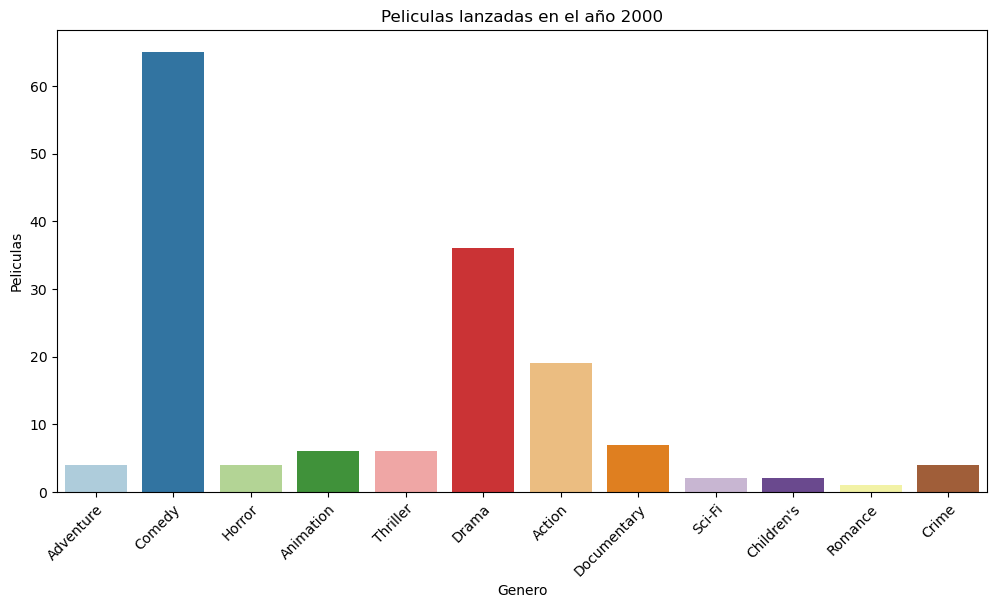

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Genero', data=muestra, palette='Paired')
plt.xlabel('Genero')
plt.ylabel('Peliculas')
plt.title('Peliculas lanzadas en el año 2000')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()